# Decision Tree

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("horse.csv")

In [4]:
df  #y value is the outcome column

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [6]:
df.isnull().sum()  #missing values are present. outcome do not have missing values

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

### split data

In [7]:
y = df['outcome']

In [8]:
x = df.drop(columns='outcome')

In [9]:
x.shape

(299, 27)

### standardize data

In [10]:
x = pd.get_dummies(x,drop_first=True) #change the categorical data to numerical values

In [11]:
x.shape

(299, 51)

### clean data

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
import numpy as np

In [14]:
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [15]:
x = imp.fit_transform(x)

In [16]:
x

array([[5.30101e+05, 3.85000e+01, 6.60000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.34817e+05, 3.92000e+01, 8.80000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.30334e+05, 3.83000e+01, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [5.29386e+05, 3.75000e+01, 7.20000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.30612e+05, 3.65000e+01, 1.00000e+02, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [5.34618e+05, 3.72000e+01, 4.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

### Test and Train split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

### Train model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
from sklearn import tree

[Text(231.240625, 209.07692307692307, 'X[5] <= 51.5\ngini = 0.54\nsamples = 239\nvalue = [61, 31, 147]'),
 Text(163.33125, 192.35076923076923, 'X[2] <= 82.0\ngini = 0.425\nsamples = 183\nvalue = [31, 18, 134]'),
 Text(118.9625, 175.62461538461537, 'X[27] <= 0.5\ngini = 0.326\nsamples = 147\nvalue = [16, 12, 119]'),
 Text(82.925, 158.89846153846153, 'X[8] <= 2112.5\ngini = 0.257\nsamples = 132\nvalue = [10, 9, 113]'),
 Text(76.72500000000001, 142.1723076923077, 'gini = 0.0\nsamples = 50\nvalue = [0, 0, 50]'),
 Text(89.125, 142.1723076923077, 'X[31] <= 0.5\ngini = 0.383\nsamples = 82\nvalue = [10, 9, 63]'),
 Text(54.25, 125.44615384615385, 'X[8] <= 4252.5\ngini = 0.547\nsamples = 41\nvalue = [10, 6, 25]'),
 Text(34.1, 108.72, 'X[6] <= 6.55\ngini = 0.479\nsamples = 32\nvalue = [5, 5, 22]'),
 Text(12.4, 91.99384615384615, 'X[1] <= 37.9\ngini = 0.494\nsamples = 9\nvalue = [4, 0, 5]'),
 Text(6.2, 75.2676923076923, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(18.6, 75.2676923076923, '

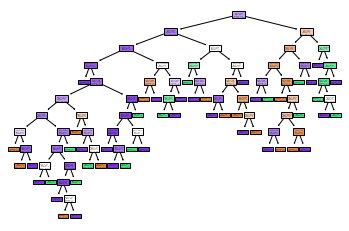

In [23]:
tree.plot_tree(dtc,filled=True) #filled is for the text to appear

### Prediction

In [24]:
y_pred = dtc.predict(x_test)

### Evaluation metrics

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.6166666666666667

In [27]:
# accuracy score is bad

### Let's check the prediction of training data

In [28]:
y_pred_tr = dtc.predict(x_train)

In [29]:
accuracy_score(y_train,y_pred_tr)

1.0

In [31]:
##This is the example of over fitting. This is what happen if we go with max number of features

### Change the depth now

In [52]:
dtc = DecisionTreeClassifier(max_depth=8)

In [53]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [54]:
y_pred = dtc.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred)

0.6166666666666667

In [56]:
y_pred_tr = dtc.predict(x_train)

In [57]:
accuracy_score(y_train,y_pred_tr)

0.9665271966527197

In [58]:
###Change the depth value again and again.  We see that 8 is the better depth value now.